# Do meter maids in Los Angeles artificially issue parking citations to increase or maintain revenues?

>It is common knowledge that one major source of income for cities are through parking citations, which can potentially compel the city to issue tickets more frequently or issue more expensive tickets. Hopefully that is not the case. Another reason cities issue parking citations is to manage their parking infrastructure. The intention is to make parking in the city more available and less chaotic.  

### To answer this question I found a dataset maintained by the city of Los Angeles that contains all parking citations from 2015 to present year. 
> This dataset has over 9 million entries, each entry representing one parking citation. Each entry contains information pertaining to the citation, such as issue date, issue time, make of the car, type of vehicle, color of vehicle, location, violation description, and fine amount. 

>You can find this data through these links:
- https://data.lacity.org/A-Well-Run-City/Parking-Citations/wjz9-h9np
- https://www.kaggle.com/cityofLA/los-angeles-parking-citations


In [61]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime as dt

#Loading Data
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/los-angeles-parking-citations/parking-citations.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Are meter maids issuing parking citations more frequently?
>To answer this question, I begin by graphing the count of citations throughout time.

In [62]:
#converting Issue Date string into datetime64
df['date'] = pd.to_datetime(df['Issue Date'], format = "%Y-%m-%dT%H:%M:%S")

#created another column to count the number of parking citations (tickets)
df['ticket_count'] =  np.where(df['Ticket number'] != None,1,0)
#df.head()

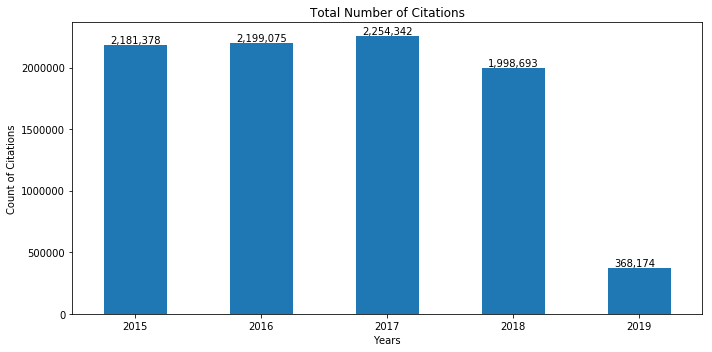

In [63]:
#creating plot of parking citations over time
plt.figure(figsize=(10,5))

#filtering erroneous data 
date_filter = df['date'] > '2014-12-31'
df_1 = df.loc[date_filter]

#grouping data by date and aggregating the count of tickets
agg_count_by_date = df_1.groupby(df_1.date.dt.year).ticket_count.sum() 

#adding data labels
for i, v in enumerate(agg_count_by_date):
    plt.text(i - 0.2, v + 15000, str("{:,}".format(v)), color='black')

#plotting bar chart of ticket counts throughout time
agg_count_by_date.plot(kind='bar')
plt.title('Total Number of Citations')
plt.ylabel('Count of Citations')
plt.xlabel('Years')
plt.xticks(rotation = 'horizontal')
plt.tight_layout()

From this chart we can see that the total number of citations stay fairly consistent. From years 2015 - 2017 the percentage change is very minimal. In 2018, you can see the total counts for the year is less than prior years. 2019 is still an ongoing year thus is not comparable in this situation. Base on this graph we can conclude that meter maids are not artificially increasing revenues by issuing tickets more frequently.

# But are meter maids issuing more expensive tickets?

>To answer this question we need to see what is the most common violation and see how much the fine costs. If majority of the fines are made up of expensive fines then we can tell that meter maids are issuing more expensive tickets. 

In [75]:
#Finding top 10 violation_desc to reorganize dataset to show top 10 and grouping remaining to other category
df['Violation Description'].value_counts()
violation_desc_count = df['Violation Description'].value_counts()
top_violation_desc = violation_desc_count.nlargest(10)
#print (top_violation_desc)

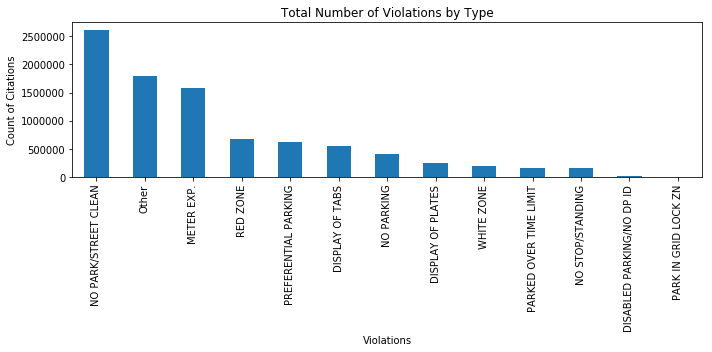

In [87]:
#creating additional column with limited type values
conditions = [
    (df['Violation Description'] == 'NO PARK/STREET CLEAN'),
    (df['Violation Description'] == 'METER EXP.'),
    (df['Violation Description'] == 'RED ZONE'),
    (df['Violation Description'] == 'PREFERENTIAL PARKING'),
    (df['Violation Description'] == 'DISPLAY OF TABS'),
    (df['Violation Description'] == 'NO PARKING'),
    (df['Violation Description'] == 'DISPLAY OF PLATES'),
    (df['Violation Description'] == 'WHITE ZONE'),
    (df['Violation Description'] == 'PARKED OVER TIME LIMIT'),
    (df['Violation Description'] == 'NO STOP/STANDING'),
    (df['Violation Description'] == 'DISABLED PARKING/NO DP ID'),
    (df['Violation Description'] == 'PARK IN GRID LOCK ZN')
]

choices = ['NO PARK/STREET CLEAN', 'METER EXP.', 'RED ZONE', 'PREFERENTIAL PARKING', 'DISPLAY OF TABS', 'NO PARKING','DISPLAY OF PLATES','WHITE ZONE','PARKED OVER TIME LIMIT','NO STOP/STANDING','DISABLED PARKING/NO DP ID','PARK IN GRID LOCK ZN']
df['violation_desc_lim'] = np.select(conditions, choices, default='Other')

#Visualization of the number of citations based on violation distributions
viol_count = df['violation_desc_lim'].value_counts()
plt.figure(figsize=(10,5))
viol_count.plot(kind='bar')
plt.title('Total Number of Violations by Type')
plt.ylabel('Count of Citations')
plt.xlabel('Violations')
plt.tight_layout()

You can see from this graph that majority of the violations are made up of "No Parking - Street Cleaning", which is a \\$73 fine. In comparison the second most violation (excluding the other bucket) is "Expired Meter", which is a \\$63 fine. These fines are fairly cheap in comparison to "Disabled Parking/No DP ID" and "Parking in Grid Lock Zone" which are \\$363 and \\$163 respectively. Those two fines are rarely issues so therefore we can conclude that meter maids do not issue more expensive fines. The block of code below was used to fine out the fine amounts for each violation. 


In [90]:
#finding out how much the fine amount for various violations
#df.loc[lambda df: df['Violation Description'] == 'NO PARK/STREET CLEAN']
    #$73
#df.loc[lambda df: df['Violation Description'] == 'METER EXP.']
    #$63
#df.loc[lambda df: df['Violation Description'] == 'RED ZONE']
    #$93
#df.loc[lambda df: df['Violation Description'] == 'PREFERENTIAL PARKING']
    #$68
#df.loc[lambda df: df['Violation Description'] == 'DISPLAY OF TABS']
    #$25
#df.loc[lambda df: df['Violation Description'] == 'NO PARKING']
    #$73
#df.loc[lambda df: df['Violation Description'] == 'DISABLED PARKING/NO DP ID']
    #$363
#df.loc[lambda df: df['Violation Description'] == 'PARK IN GRID LOCK ZN']
    #$163
#df.loc[lambda df: df['violation_desc_lim'] == 'Other']
    #$50-93

 # Do meter maids discriminate against different vehicles?
 > Since we determined that meter maids in LA do not artificially increase the cities, I would like to know if meter maids unfairly target vehicles or they perform their job justifiably. 
 
To answer this question I will compare the average Fine Amount to the average Fine Amount split by different variables. If the averages deviate depending on the variable there is a potential indicator that meter maids might unfairly target some cars. The variables that I would be testing are Vehicle Color, Vehicle Make, and Vehicle Type. 

To start I will calculate summary statistics of the Fine Amount below:


In [92]:
mean_fa = np.round(np.mean(df['Fine amount']),2)
var_fa = np.round(np.var(df['Fine amount']),2)
std_fa = np.round(np.std(df['Fine amount']),2)
min_fa = np.min(df['Fine amount'])
q25_fa = np.nanquantile(df['Fine amount'],.25)
q50_fa = np.nanquantile(df['Fine amount'],.5)
q75_fa = np.nanquantile(df['Fine amount'],.75)
max_fa = np.max(df['Fine amount'])

print("Fine amount mean: " + str(mean_fa))
print("Fine amount variance: " + str(var_fa))
print("Fine amount standard deviation: " + str(std_fa))
print("Fine amount minimum: " + str(min_fa))
print("Fine amount 25% quartile: " + str(q25_fa))
print("Fine amount 50% quartile: " + str(q50_fa))
print("Fine amount 75% quartile: " + str(q75_fa))
print("Fine amount max: " + str(max_fa))

Fine amount mean: 70.11
Fine amount variance: 1032.39
Fine amount standard deviation: 32.13
Fine amount minimum: 10.0
Fine amount 25% quartile: 63.0
Fine amount 50% quartile: 68.0
Fine amount 75% quartile: 73.0
Fine amount max: 505.0


# Summary Statistics for Fine Amount Split by Vehicle Color

In [93]:
#Finding top 10 color of vehicles to reorganize dataset to show top 10 and grouping remaining to other category
color_count = df['Color'].value_counts()
top_color = color_count.nlargest(10)
#print (top_color)

#creating additional column with limited color values
conditions = [
    (df['Color'] == 'BK'),
    (df['Color'] == 'WT'),
    (df['Color'] == 'GY'),
    (df['Color'] == 'SL'),
    (df['Color'] == 'BL'),
    (df['Color'] == 'RD'),
    (df['Color'] == 'GN'),
    (df['Color'] == 'BN'),
    (df['Color'] == 'GO'),
    (df['Color'] == 'MR')
]
choices = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Brown', 'Gold', 'Maroon']
df['color_lim'] = np.select(conditions, choices, default='Other')

#df.head()

#calulation of summary statistics split by new color grouping. To be compared to highlevel summary statistics for Fine amount
mean_color_lim = df.groupby('color_lim')['Fine amount'].mean()
std_color_lim = df.groupby('color_lim')['Fine amount'].std()
var_color_lim = df.groupby('color_lim')['Fine amount'].var()

print("Fine amount mean: " + str(mean_color_lim))
print()
#print("Fine amount variance: " + str(var_color_lim))
#print()
print("Fine amount standard deviation: " + str(std_color_lim))

Fine amount mean: color_lim
Black     68.792812
Blue      69.383408
Brown     80.705050
Gold      70.398228
Gray      70.051866
Green     69.618646
Maroon    70.530598
Other     72.023078
Red       70.203069
Silver    69.686459
White     70.551845
Name: Fine amount, dtype: float64

Fine amount standard deviation: color_lim
Black     31.884252
Blue      30.818307
Brown     25.716833
Gold      35.185596
Gray      32.483802
Green     29.629901
Maroon    32.545433
Other     44.891587
Red       29.579653
Silver    30.445442
White     30.310376
Name: Fine amount, dtype: float64


# Summary Statistics for Fine Amount Split by Vehicle Make

In [94]:
#Finding top 10 make of vehicles to reorganize dataset to show top 10 and grouping remaining to other category
df['Make'].value_counts()
make_count = df['Make'].value_counts()
top_make = make_count.nlargest(10)
#print (top_make)

#creating additional column with limited make values
conditions = [
    (df['Make'] == 'TOYT'),
    (df['Make'] == 'HOND'),
    (df['Make'] == 'FORD'),
    (df['Make'] == 'NISS'),
    (df['Make'] == 'CHEV'),
    (df['Make'] == 'BMW'),
    (df['Make'] == 'MERZ'),
    (df['Make'] == 'VOLK'),
    (df['Make'] == 'HYUN'),
    (df['Make'] == 'DODG')
]
choices = ['Toyota', 'Honda', 'Ford', 'Nissan', 'Chevy', 'BMW', 'Mercedes', 'Volkswagen', 'Hyundai', 'Dodge']
df['make_lim'] = np.select(conditions, choices, default='Other')

#df.head()

#calulation of summary statistics split by new color grouping. To be compared to highlevel summary statistics for Fine amount
mean_make_lim = df.groupby('make_lim')['Fine amount'].mean()
std_make_lim = df.groupby('make_lim')['Fine amount'].std()
var_make_lim = df.groupby('make_lim')['Fine amount'].var()

print("Fine amount mean: " + str(mean_make_lim))
print()
#print("Fine amount variance: " + str(var_make_lim))
#print()
print("Fine amount standard deviation: " + str(std_make_lim))

Fine amount mean: make_lim
BMW           65.442264
Chevy         70.922228
Dodge         70.678879
Ford          70.440218
Honda         70.141109
Hyundai       70.790202
Mercedes      67.639759
Nissan        71.371940
Other         70.476902
Toyota        70.548458
Volkswagen    67.595527
Name: Fine amount, dtype: float64

Fine amount standard deviation: make_lim
BMW           32.150545
Chevy         33.535121
Dodge         33.498874
Ford          32.124307
Honda         30.851581
Hyundai       30.294337
Mercedes      35.655078
Nissan        32.234843
Other         33.489157
Toyota        29.573913
Volkswagen    27.140117
Name: Fine amount, dtype: float64


# Summary Statistics for Fine Amount Split by Vehicle Type

In [95]:
#Finding top 5 type of vehicles to reorganize dataset to show top 10 and grouping remaining to other category
df['Body Style'].value_counts()
type_count = df['Body Style'].value_counts()
top_type = type_count.nlargest(5)
#print (top_type)

#creating additional column with limited type values
conditions = [
    (df['Body Style'] == 'PA'),
    (df['Body Style'] == 'PU'),
    (df['Body Style'] == 'VN'),
    (df['Body Style'] == 'TK'),
    (df['Body Style'] == 'CM')
]
choices = ['Passenger Auto', 'Pick up', 'Van', 'Truck', 'Commercial']
df['type_lim'] = np.select(conditions, choices, default='Other')

#df.head()

#calulation of summary statistics split by new color grouping. To be compared to highlevel summary statistics for Fine amount
mean_type_lim = df.groupby('type_lim')['Fine amount'].mean()
std_type_lim = df.groupby('type_lim')['Fine amount'].std()
var_type_lim = df.groupby('type_lim')['Fine amount'].var()

print("Fine amount mean: " + str(mean_type_lim))
print()
#print("Fine amount variance: " + str(var_type_lim))
#print()
print("Fine amount standard deviation: " + str(std_type_lim))

Fine amount mean: type_lim
Commercial        82.127077
Other             72.723295
Passenger Auto    69.488321
Pick up           70.857099
Truck             77.785259
Van               73.649680
Name: Fine amount, dtype: float64

Fine amount standard deviation: type_lim
Commercial        25.513000
Other             46.420977
Passenger Auto    31.878144
Pick up           31.684409
Truck             27.821767
Van               33.127604
Name: Fine amount, dtype: float64


# Numeric Comparison

In [96]:
#calculating the deviation from the mean split by the different groups
color_diff = mean_color_lim - mean_fa
make_diff = mean_make_lim - mean_fa
type_diff = mean_type_lim - mean_fa

print(color_diff)
print()
print(make_diff)
print()
print(type_diff)

color_lim
Black     -1.317188
Blue      -0.726592
Brown     10.595050
Gold       0.288228
Gray      -0.058134
Green     -0.491354
Maroon     0.420598
Other      1.913078
Red        0.093069
Silver    -0.423541
White      0.441845
Name: Fine amount, dtype: float64

make_lim
BMW          -4.667736
Chevy         0.812228
Dodge         0.568879
Ford          0.330218
Honda         0.031109
Hyundai       0.680202
Mercedes     -2.470241
Nissan        1.261940
Other         0.366902
Toyota        0.438458
Volkswagen   -2.514473
Name: Fine amount, dtype: float64

type_lim
Commercial        12.017077
Other              2.613295
Passenger Auto    -0.621679
Pick up            0.747099
Truck              7.675259
Van                3.539680
Name: Fine amount, dtype: float64


#### We can compare the deviations from the mean through these numbers but I found it easier to decipher the conclusion through graphs, which is shown below.

# Graphical Comparison

Text(0.5, 0, 'Vehicle Type')

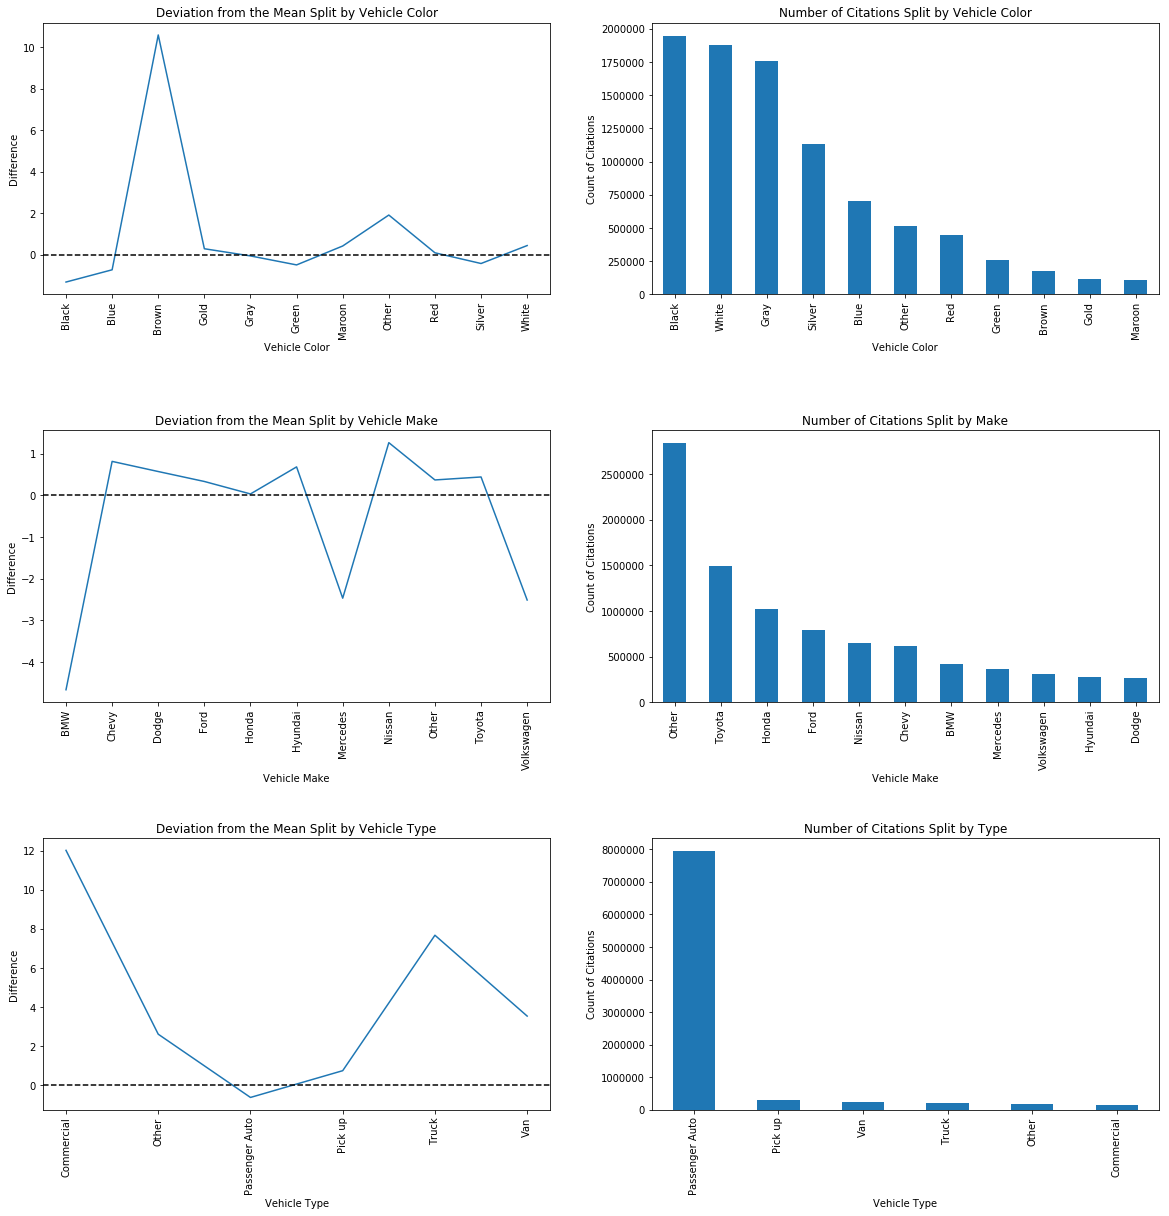

In [102]:
#plotting deviation from the means to better visualize differences
plt.figure(figsize=(20,20))
plt.tight_layout()

# Graph of the deviation from the mean split by color
plt.subplot(3,2,1)
plt.plot(color_diff)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Deviation from the Mean Split by Vehicle Color')
plt.xticks(rotation = 'vertical')
plt.ylabel('Difference')
plt.xlabel('Vehicle Color')
plt.subplots_adjust(hspace = 0.5)

# Graph of the deviation from the mean split by make
plt.subplot(3,2,3)
plt.plot(make_diff)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Deviation from the Mean Split by Vehicle Make')
plt.ylabel('Difference')
plt.xlabel('Vehicle Make')
plt.xticks(rotation = 'vertical')
plt.subplots_adjust(hspace = 0.5)

# Graph of the deviation from the mean split by type
plt.subplot(3,2,5)
plt.plot(type_diff)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Deviation from the Mean Split by Vehicle Type')
plt.ylabel('Difference')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 'vertical')

#Visualization of the number of citations based on vehicle color distributions
viol_count = df['color_lim'].value_counts()
plt.subplot(3,2,2)
viol_count.plot(kind='bar')
plt.title('Number of Citations Split by Vehicle Color')
plt.ylabel('Count of Citations')
plt.xlabel('Vehicle Color')

#Visualization of the number of citations based on vehicle make distributions
viol_count = df['make_lim'].value_counts()
plt.subplot(3,2,4)
viol_count.plot(kind='bar')
plt.title('Number of Citations Split by Make')
plt.ylabel('Count of Citations')
plt.xlabel('Vehicle Make')

#Visualization of the number of citations based on vehicle type distributions
viol_count = df['type_lim'].value_counts()
plt.subplot(3,2,6)
viol_count.plot(kind='bar')
plt.title('Number of Citations Split by Type')
plt.ylabel('Count of Citations')
plt.xlabel('Vehicle Type')


The graphs on the left show the deviation from the mean split by various categories and the graphs on the right show the distributions of the number of citations split by the respective category. 

Vehicle Color:
> We can see that based on vehicle color the deviation from the mean is fairly small for almost every color. The color that deviates the most is brown, and looking at the chart on the right. We can see that brown makes up a very small amount of the population making it easier to be subjected to volatility. From this we can conclude that meter maids do not discriminate based on vehicle color. 

Vehicle Make:
> These graphs contain a very similar story to the graphs based on vehicle color. Majority of the vehicle brands are very close to the average fine amount excluding a handful of brands which make up very little of the population. Brands such as BMW, Mercedes, and Volkswagen. We can also conclude that meter maids do not discriminate based on vehicle make. 

Vehicle Type:
> From this graph we can see that a lot of the vehicle types deviate from the mean dramatically. However, we can see that passenger auto makes up almost every single citation and is very representative of the mean. This one is harder to say definitively that meter maids do not discriminate against vehicle type since there are not enough data representing the other vehicle types.  

# Potential Future Research 

- In the future, one can make a more rigorous analysis by creating a regression analysis to compare vehicle fines based on vehicle characteristics. 

- Another question that could lead to interesting results is analyzing the time of day of the parking citation. Meter maids are most likely going to issue more tickets when there are more cars in the city and would be interesting if that is true or meter maids issue citations consistently throughout the day. 

- It would also be interesting to see if meter maids try to meet a certain quota of parking citations by the end of the month or quarter. 

- If possible, I would find it interesting to see if we can use this data along with machine learning to assist drivers on what locations they should park in as compared to high risk areas. 
